<a href="https://colab.research.google.com/github/ukeshbhaal/Guvi--Task-7-ML/blob/main/Copy_of_SVM_Assignment-14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

**Importing the dataset**

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
#Encoding - Gender
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Gender']
# We can also Encode labels of multiple columns at once like - cols=['Gender','etc'] like that- but here
data[cols] = data[cols].apply(le.fit_transform)

data=data.drop(['User ID'], axis=1)
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
x = data[[ "Age","EstimatedSalary"]].values
y = data['Purchased'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
#print(x,y)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([   ('std_scalar', StandardScaler())])
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)
print("\n X_train\n",x_train,"\n X_test\n",x_test)
print("\n Y_train\n",y_train,"\n Y_test\n",y_test)


 X_train
 [[ 0.02273414 -0.26389006]
 [ 0.79431698 -1.42026223]
 [-0.26660943 -0.38249233]
 [ 0.89076483  1.2779395 ]
 [ 0.3120777  -0.20458892]
 [-0.26660943 -0.59004631]
 [-0.26660943 -1.42026223]
 [ 1.46945196 -1.06445541]
 [-0.07371372  0.12156733]
 [-0.84529656 -0.67899802]
 [-0.07371372  0.00296506]
 [-0.26660943  0.09191676]
 [ 0.21562985 -0.3231912 ]
 [-0.26660943  0.26982017]
 [ 0.11918199  0.03261563]
 [ 1.95169124  2.19710712]
 [-1.03819227 -1.47956337]
 [ 0.3120777   0.29947074]
 [ 2.04813909 -1.21270825]
 [-1.13464012 -0.53074518]
 [ 0.21562985  0.1512179 ]
 [-0.26660943 -0.94585313]
 [-0.65240085  0.03261563]
 [ 0.21562985  0.06226619]
 [ 0.40852556 -0.14528779]
 [-1.13464012 -1.12375655]
 [-0.07371372  2.25640826]
 [ 1.08366054 -0.14528779]
 [ 0.89076483  1.04073495]
 [-0.07371372  0.26982017]
 [-0.55595299 -1.5388645 ]
 [-1.13464012 -1.03480484]
 [-0.7488487   1.36689121]
 [ 1.08366054  0.56632586]
 [ 1.56589982 -1.30165996]
 [ 0.69786912 -1.42026223]
 [-0.65240085 -1.

In [ ]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (280, 2) (280,)
Test set: (120, 2) (120,)


**Fitting SVM to the Training set**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

clf_ploy = svm.SVC(kernel='poly',degree=1)
clf_ploy.fit(x_train, y_train)

clf_gaussian=svm.SVC(kernel='rbf')
clf_gaussian.fit(x_train, y_train)

clf_sig=svm.SVC(kernel='sigmoid')
clf_sig.fit(x_train, y_train)

SVC(kernel='sigmoid')

**Predicting the Test set results**

In [ ]:
y_pred = clf.predict(x_test)
y_pred_ploy = clf_ploy.predict(x_test)
y_pred_gaus = clf_gaussian.predict(x_test)
y_pred_sig = clf_sig.predict(x_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred_ploy))
print(classification_report(y_test,y_pred_ploy))
print(confusion_matrix(y_test,y_pred_gaus))
print(classification_report(y_test,y_pred_gaus))
print(confusion_matrix(y_test,y_pred_sig))
print(classification_report(y_test,y_pred_sig))
"""from sklearn.metrics import classification_report, confusion_matrix
import itertools

clf.score(x_test, y_test)

y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
"""

[[71  6]
 [13 30]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        77
           1       0.83      0.70      0.76        43

    accuracy                           0.84       120
   macro avg       0.84      0.81      0.82       120
weighted avg       0.84      0.84      0.84       120

[[72  5]
 [13 30]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        77
           1       0.86      0.70      0.77        43

    accuracy                           0.85       120
   macro avg       0.85      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120

[[72  5]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.88      0.88      0.88        43

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg     

"from sklearn.metrics import classification_report, confusion_matrix\nimport itertools\n\nclf.score(x_test, y_test)\n\ny_pred = clf.predict(x_test)\nconfusion_matrix(y_test,y_pred)\npd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)\n"

In [ ]:
"""def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
   
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')


   print(cm)


   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)


   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")


   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

yhat = clf.predict(x_test)
yhat[:5]
"""

'def plot_confusion_matrix(cm, classes,\n                         normalize=False,\n                         title=\'Confusion matrix\',\n                         cmap=plt.cm.Blues):\n   \n   This function prints and plots the confusion matrix.\n   Normalization can be applied by setting `normalize=True`.\n   \n   if normalize:\n       cm = cm.astype(\'float\') / cm.sum(axis=1)[:, np.newaxis]\n       print("Normalized confusion matrix")\n   else:\n       print(\'Confusion matrix, without normalization\')\n\n\n   print(cm)\n\n\n   plt.imshow(cm, interpolation=\'nearest\', cmap=cmap)\n   plt.title(title)\n   plt.colorbar()\n   tick_marks = np.arange(len(classes))\n   plt.xticks(tick_marks, classes, rotation=45)\n   plt.yticks(tick_marks, classes)\n\n\n   fmt = \'.2f\' if normalize else \'d\'\n   thresh = cm.max() / 2.\n   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):\n       plt.text(j, i, format(cm[i, j], fmt),\n                horizontalalignment="center",\n   

In [ ]:
"""cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))"""

'cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,4])\nnp.set_printoptions(precision=2)\n\nprint (classification_report(y_test, yhat))'

In [ ]:
score = clf.score(x_test, y_test)
print("Linear - ",score*100)
score_ploy = clf_ploy.score(x_test, y_test)
print("Polynomial SVM Kernel - ",score_ploy*100)
score_gaus = clf_gaussian.score(x_test, y_test)
print("Gaussian Kernel - ",score_gaus*100)
score_sig = clf_sig.score(x_test, y_test)
print("Sigmoid Kernel - ",score_sig*100)

Linear -  84.16666666666667
Polynomial SVM Kernel -  85.0
Gaussian Kernel -  91.66666666666666
Sigmoid Kernel -  65.0


**Visualising the Training set results**

In [ ]:
support_vectors = clf_gaussian.support_vectors_

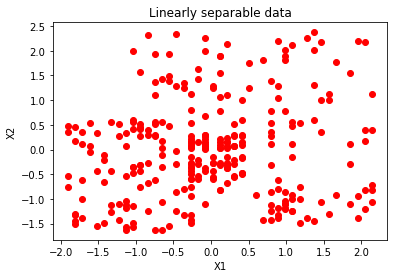

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], color='red')
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

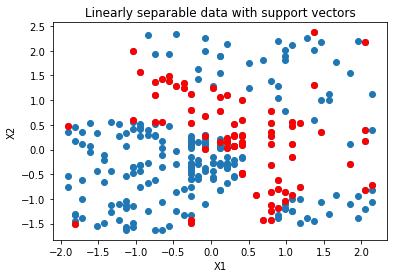

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

**Visualising the Test set results**

In [ ]:
plt.scatter(y_test[:,0], y_test[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

IndexError: ignored